핸즈온 4장 모델 훈련 p.184-203
### **[개념 정리+코드 필사]📝**

### **4.5 규제가 있는 선형 모델**

- 과대적합 감소시키기 위해 모델 규제: 자유도 줄이기, 다항식 차수 감소(다항 회귀), 모델의 가중치 제한(선형 회귀)

#### 📘 4.5.1 릿지회귀

- 릿지회귀: 규제가 추가된 선형 회귀.규제항이 비용함수에 추가되어 모델의 가중치가 가능한 작게 유지되도록 함. 훈련 동안에만 비용함수가 추가되면 훈련 끝난 후엔 규제 없는 성능지표로 평가
  - 파라미터 α: 모델을 얼마나 많이 규제할지 조절. 0이면 선형회귀이고 α가 클수록 가중치가 0에 가까워져 수평선이 됨(분산 줄고 편향 커짐)
  - 다항회귀에서 릿지 규제 사용하기: PolynomialFeatures(degree=10)으로 데이터를 확장하고 StandardScaler로 조정 후 릿지모델 적용
  - 사이킷런의 정규방정식 사용: 📃Ridge(alpha=1, solver='cholesky')
  - 확률적 경사하강법 사용: 📃SGDRegressor(penalty='l2')


#### 📘 4.5.2 라쏘회귀

- 라쏘 회귀: 비용함수에 규제항을 더할 때 가중치 벡터의 l1노름을 사용
  - 덜 중요한 특성의 가중치를 제거(가중치=0)
  - 자동으로 특성 선택하고 희소 모델을 만듦
    - 예를 들어 다항 특성의 가중치를 모두 0으로 만들어 선형적으로 함

- 등고선: l1, l2 손실함수 / 노란점선: 경사하강법으로 파라미터 최적화 / 하얀 원: 경사하강법이 초기화된 모델 파라미터 최적화 / 빨간 점: 전역 최적점
  - 라쏘: α를 증가하면 전역 최적점이 노란 점선을 따라 오른쪽으로 이동 / 릿지: α증가하면 최적점이 원점에 가까워짐(완전한 0은 아님)
  - 릿지 특징: l2 손실은 원점에 가까울수록 줄어듦. 파라미터가 지역 최적점에 가까워질수록 그래디언트가 작아져서 경사하강법이 느려지고 진동없이 수렴함(라쏘는 진동)
  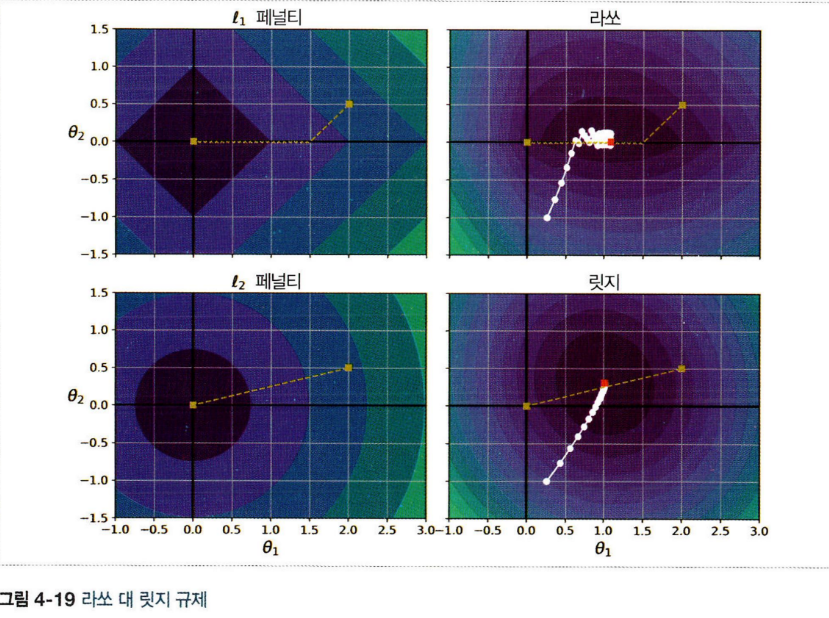   
  
- 라쏘의 비용함수는 θ=0일때 미분가능하지 않지만, 서브그레이디언트 g사용하면 경사하강법 적용가능

- 사이킷런의 정규방정식 사용: 📃Lasso(alpha=1)
- 확률적 경사하강법 사용: 📃SGDRegressor(penalty='l1')

#### 📘 4.5.3 엘라스틱넷

- 엘라스틱넷: 릿지+라쏘 절충 모델
  - 규제항: 릿지와 회귀의 규제항을 더해서 사용. 혼합비율(r)을 사용해 정도를 조절함. r=0이면 릿지 회귀, r=1이면 라쏘 회귀
  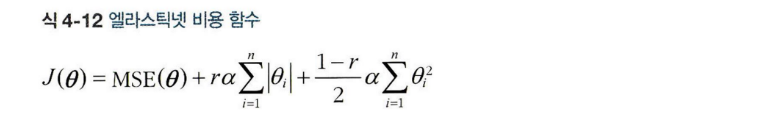

- 릿지를 기본으로 사용하되 사용하는 특성이 몇개 뿐이면 라쏘나 엘라스틱넷을 사용.(불필요한 특성의 가중치를 0으로 만듦)
  - 라쏘보다 엘라스틱넷 사용하는 경우: 특성 수가 훈련 샘플 수보다 많거나 특성 몇개가 강하게 연관되어 있을 때

- 📃ElasticNet(alpha=0.1, l1_ratio=0.5)


#### 📘 4.5.4 조기종료

- 조기종료: 경사하강법 같은 반복학습 알고리즘을 규제하기 위해 검증 에러가 최솟값에 도달하면 훈련을 중지.
  - 경사하강법으로 훈련시 과대적합이 일어나기 전 에러가 일정시간동안 최솟값보다 클때 학습중지
  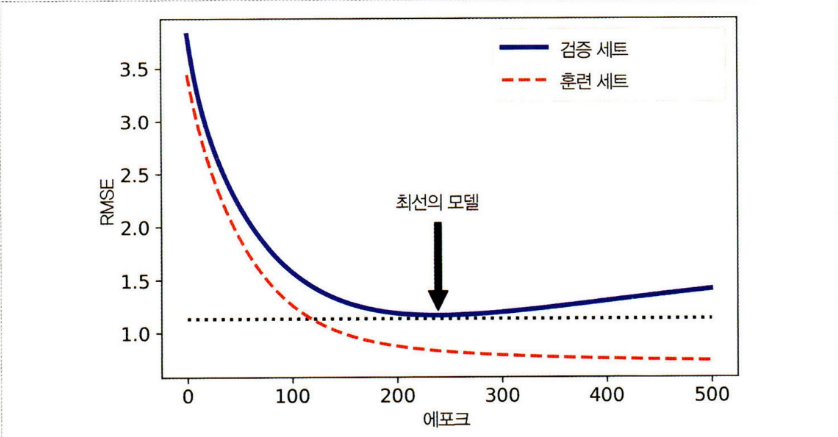


In [ ]:
# 4.5.1 릿지 회귀
import numpy as np
m = 100
X = 6 * np.random.rand(m,1)-3
y = 0.5 * X **2 + X + 2 + np.random.randn(m,1)

# 사이킷런의 정규방정식
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([4.97505467])

In [ ]:
# 확률적 경사하강법
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.95106239])

In [ ]:
# 4.5.2 라쏘 회귀

from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([4.9302196])

In [ ]:
# 확률적 경사하강법
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l1") # l1
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.95051335])

In [ ]:
# 4.5.3 엘라스틱넷

from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([4.92922761])

In [ ]:
# 4.5.4 조기 종료

from sklearn.base import clone
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2)

# 데이터 준비
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True, penalty=None, learning_rate='constant', eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled, y_train.ravel())
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)

### **4.6 로지스틱 회귀**

분류에서도 사용하는 회귀 알고리즘. 샘플이 특정 클래스에 속할 확률을 추정해, 확률이 50%가 넘으면 해당 클래스에 속한다고 예측함(양성 클래스)

#### 📘 4.6.1 확률 추정

- 로지스틱 회귀: 선형 회귀처럼 입력 특성의 가중치 합을 계산, 결괏값의 로지스틱을 출력함
  - 로지스틱: 0과 1 사이의 값을 출력하는 시그모이드 함수. 샘플이 양성 클래스에 속할 확률을 추정함(0.5보다 크면 $\hat{y}$=1로 추정)
  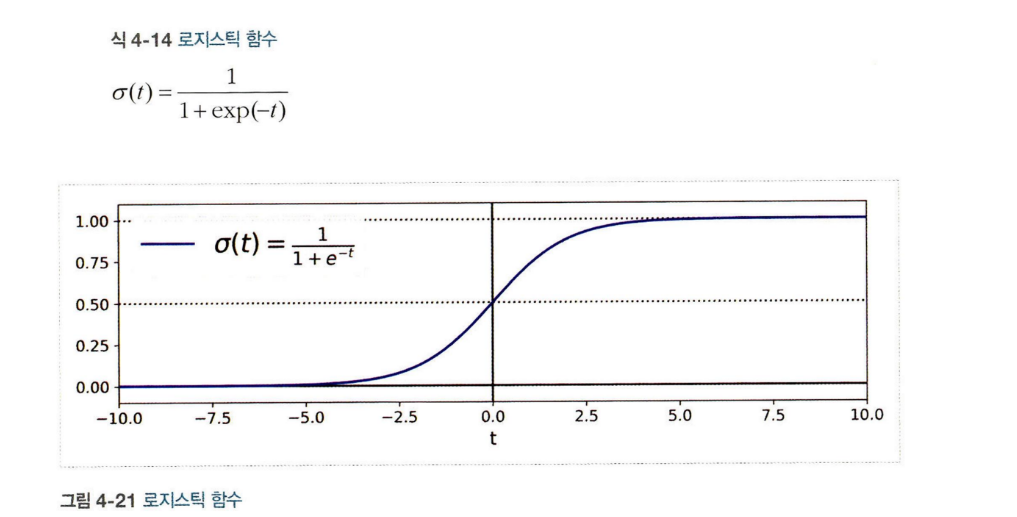
  




#### 📘 4.6.2 훈련과 비용 함수

- 로지스틱 회귀모델의 훈련:
  - 양성 샘플(y=1)은 높은 확률을 추정하고( 𝐶(θ)=-log($\hat{p}$) ) 음성 샘플(y=0)은 낮은 확률을 추정하는 ( 𝐶(θ)=-log(1-$\hat{p}$) ) 모델의 벡터 ϴ찾기
  - 하나의 훈련 샘플에 대한 비용함수:
  >  𝐶(θ)=-log($\hat{p}$),  𝐶(θ)=-log(1-$\hat{p}$)


- 전체 훈련 세트의 비용함수(=로그손실): 모든 훈련 샘플 비용을 평균한 것. 최솟값을 계산하는 해는 없으나 볼록 함수이므로 경사하강법으로 전역 최솟값을 찾을 수 있음
  - 각 샘플의 예측 오차를 계산하고 j번째 특성값을 곱해 모든 샘플에 대해 평균을 냄.
  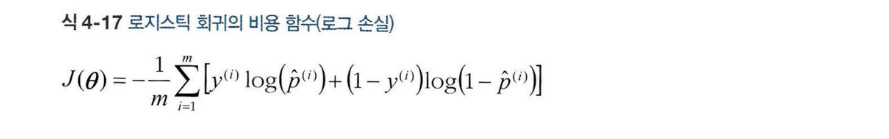
  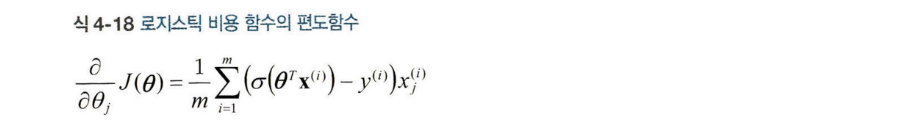

- 확률적 경사하강법(한번에 하나의 샘플) / 미니배치 경사하강법(한번에 하나의 미니배치)



#### 📘 4.6.3 결정 경계

- 붓꽃 데이터셋 사용(3 종류)
- 꽃잎 너비 기반 Versicolor 종 감지하는 분류기
  - 로지스틱 회귀 모델 훈련
  - 각 꽃에 대한 모델의 추정 확률 계산
  - 가장 확률이 높은 클래스를 반환: 양쪽의 확률이 50%가 되는 근방에서 결정경계가 만들어짐
  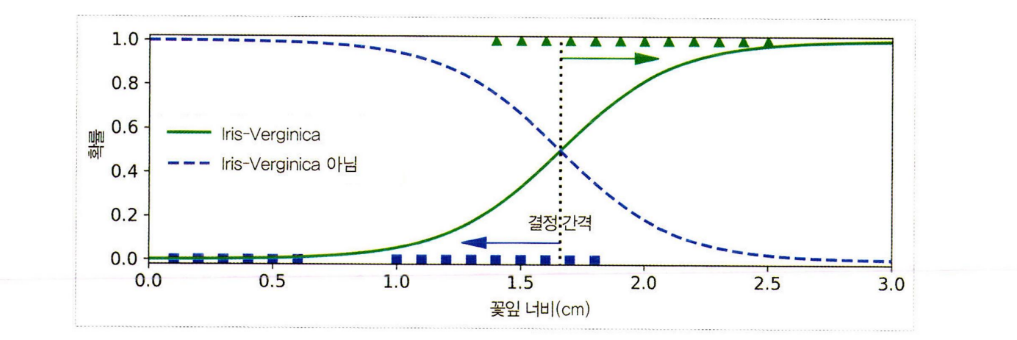

- 두개의 특성(꽃잎 너비, 길이)을 기반으로 한 Versicolor 종 감지 분류기
  - 점선: 모델이 50%확률을 추정하는 지점. 즉 결정 경계임
  - 결정경계가 선형임. 추정 확률도 선형
  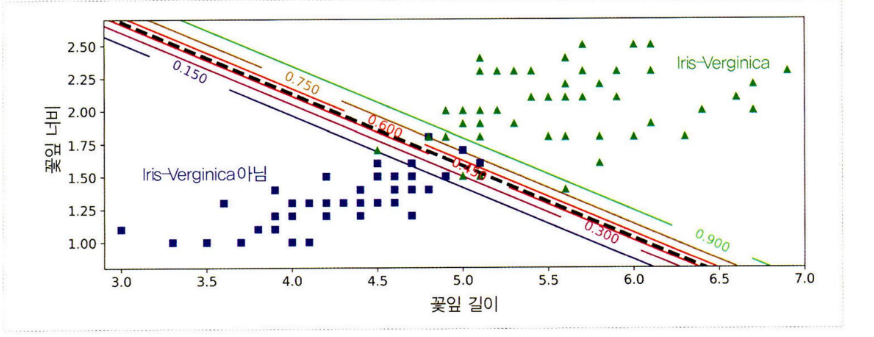

- 로지스틱 회귀 모델도 l1, l2 규제 가능. 사이킷런은 l2 규제가 기본(C 파라미터로 조절)


#### 📘 4.6.4 소프트맥스 회귀

- 소프트맥스 회귀/다항 로지스틱 회귀: 로지스틱 회귀 모델로 여러 개의 이진 분류기를 훈련시켜 연결하지 않고 직접 다중 클래스를 지원하도록 일반화
- 소프트맥스 회귀 모델이 각 클래스 k에 대한 점수 $s_k(x)$를 계산 -> 점수에 소프트맥스 함수(정규화된 지수 함수)적용해 각 클래스의 확률 추정
  - 소프트맥스 점수: 로짓, 로그-오즈
    $$
    s_k(x)=(θ^k)^Tx
    $$
  - 각 클래스의 파라미터 벡터 -> 파라미터 행렬로 저장됨
  - 소프트맥스 함수: 각 점수에 지수 함수를 적용한 후 정규화함. 추정 확률이 가장 높은 클래스를 선택함
  $$
  \text{Softmax}(z_i)= \hat{p}_k = \frac{e^{z_i}}{\sum_{j=1}^{n} e^{z_j}}
  $$
  - argmax연산으로 추정확률이 최대인 k값을 반환함

- 훈련방법: 모델이 타깃 클래스에 대해 높은 확률을 추정하도록 만드는 것이 목적. 크로스 엔트로피 비용함수를 최소화
  - 크로스 엔트로피 비용함수: 낮은 확률을 예측하는 모델을 억제함. 추정된 타깃 클래스의 확률이 얼마나 잘 맞는지 측정하는 용도로 사용함. 두개의 클래스(k=2)일 때 로지스틱 회귀의 비용함수와 같음
  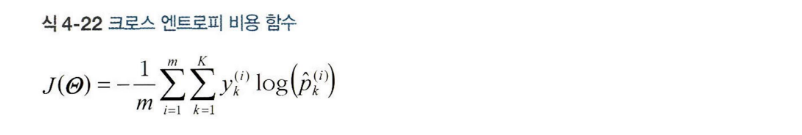
  - 각 클래스에 대한 크로스 엔트로피의 그레이디언트 벡터를 계산해, 비용함수를 최소화하도록 경사하강법을 이용해 파라미터 행렬Θ을 찾음
  - 📃 LogisticRegression(multi_class='multinomial', solver='lbfgs',C=10)
    ```
    - multi_class='multinomial': 다중 클래스 분류를 위한 소프트맥스 회귀
    - solver='lbfgs': 소프트맥스 지원 알고리즘
    - C=10: l2 규제 조정
    ```

  - 소프트맥스 회귀 결정경계: 배경색으로 구분해 보면 결정 경계는 모두 선형이고 클래스에 대한 확률(색 곡선)은 곡선임. 추정확률이 50% 이하인 클래스로도 예측가능함
  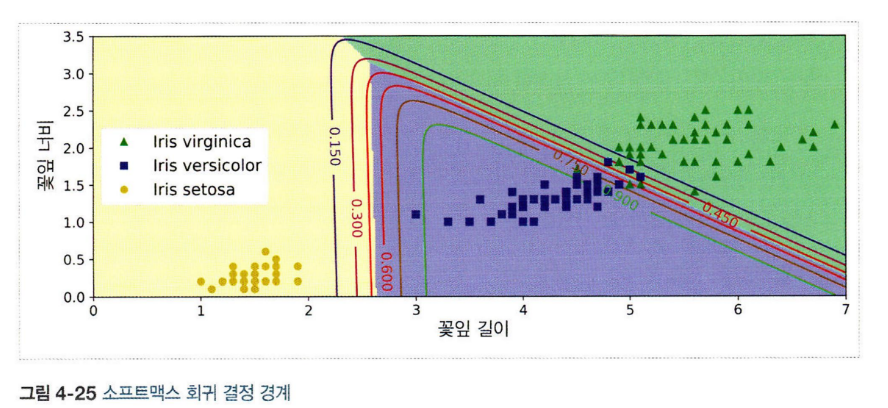






In [ ]:
# 4.6.3

from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
X = iris['data'][:,3:]
y = (iris['target']==2).astype(int)

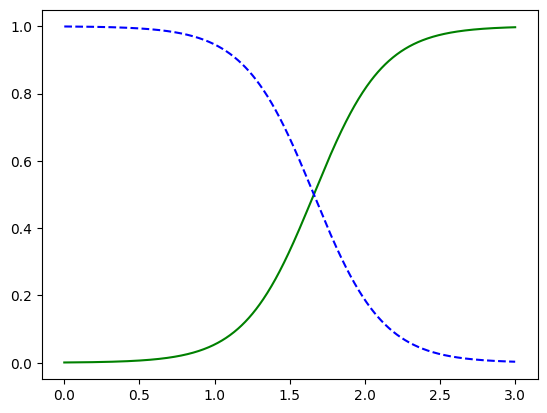

In [ ]:
## 로지스틱 회귀 모델 훈련
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)

## 꽃잎 너비 0~3cm인 꽃에 대한 모델 추정 확률
import matplotlib.pyplot as plt
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1],"g-", label='Iris virginica')
plt.plot(X_new, y_proba[:,0],"b--", label="not Iris virginica")

In [ ]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

In [ ]:
# 4.6.4 소프트맥스 회귀

X=iris['data'][:,(2,3)]
y=iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X,y)
softmax_reg.predict([[5,2]])

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


array([2])

In [ ]:
softmax_reg.predict_proba([[5,2]])

array([[6.21626375e-07, 5.73689803e-02, 9.42630398e-01]])